# Imports

In [4]:
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
np.random.seed(0)

# Data

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization

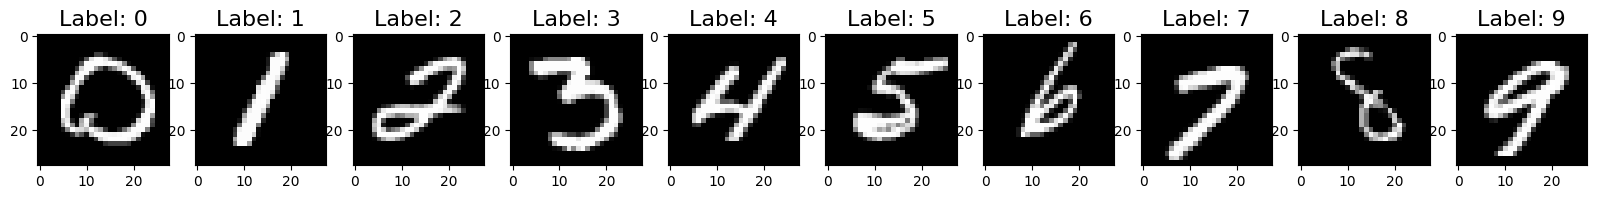

In [7]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
    sample = x_train[y_train == i][100]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize = 16)

In [8]:
for i in range (num_classes):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
for i in range (num_classes):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation

In [12]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [31]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Model Creation: Fully Connected Neural Network

In [18]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784, ), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ dense_3 (Dense)          │ (None, 128)       │   100,480 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_4 (Dense)          │ (None, 128)       │    16,512 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_1 (Dropout)      │ (None, 128)       │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_5 (Dense)          │ (None, 10)        │     1,290 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
batch_size = 512
epochs = 10
history = model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9024 - loss: 0.3299 - val_accuracy: 0.7524 - val_loss: 61.5871
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9082 - loss: 0.3112 - val_accuracy: 0.7568 - val_loss: 61.1053
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9084 - loss: 0.3065 - val_accuracy: 0.7647 - val_loss: 59.7618
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9141 - loss: 0.2932 - val_accuracy: 0.7828 - val_loss: 55.2943
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9171 - loss: 0.2819 - val_accuracy: 0.7874 - val_loss: 54.5134
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9205 - loss: 0.2750 - val_accuracy: 0.8032 - val_loss: 50.5625
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9226 - loss: 0.2658 - val_accuracy: 0.8047 - val_loss: 50.7158
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9240 - loss: 0.2575 - val_accur

# Evaluation

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 51.3143
Test Loss: 46.75569534301758, Test Accuracy: 0.8209999799728394


In [60]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 8 5 6]


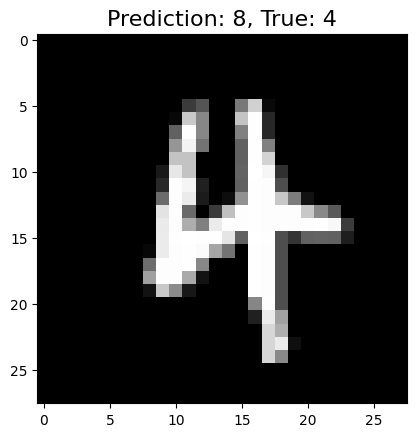

In [61]:
#Sample Testing
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Prediction: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

# Confusion Matrix

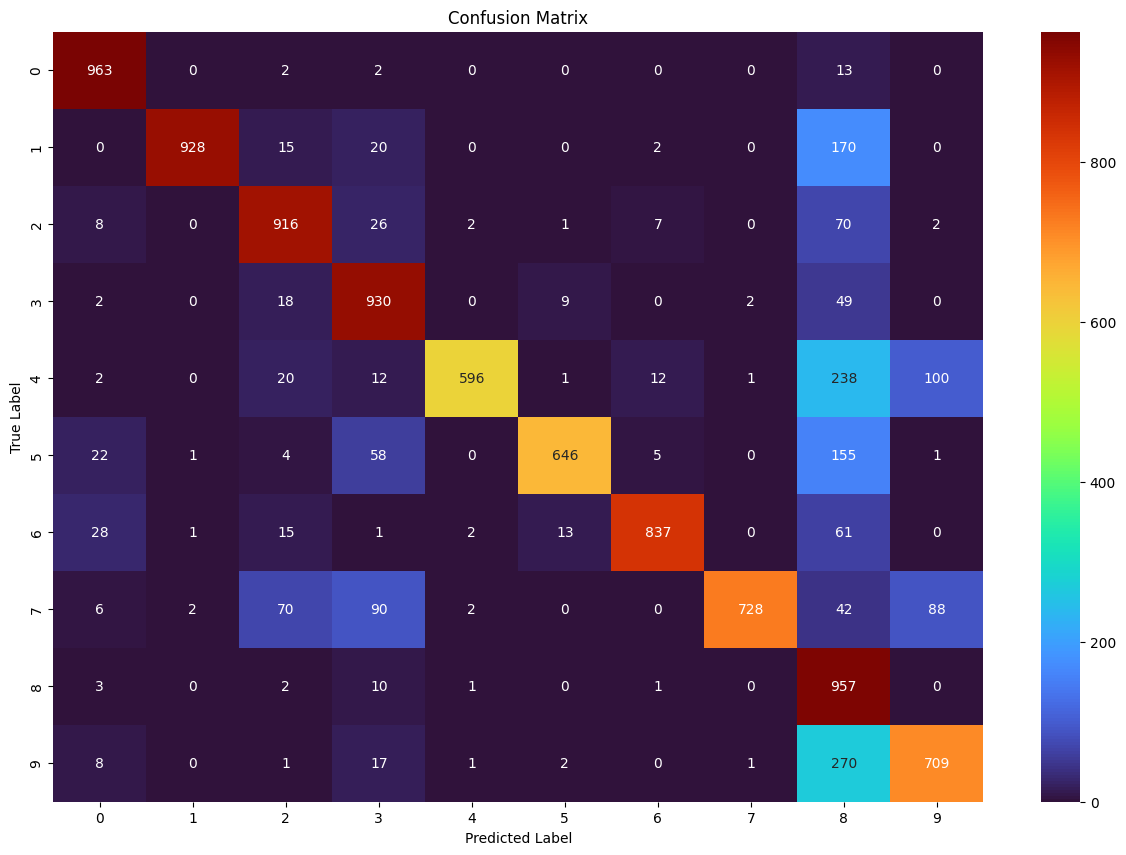

In [62]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "turbo")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investagion of Errors

In [63]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [64]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

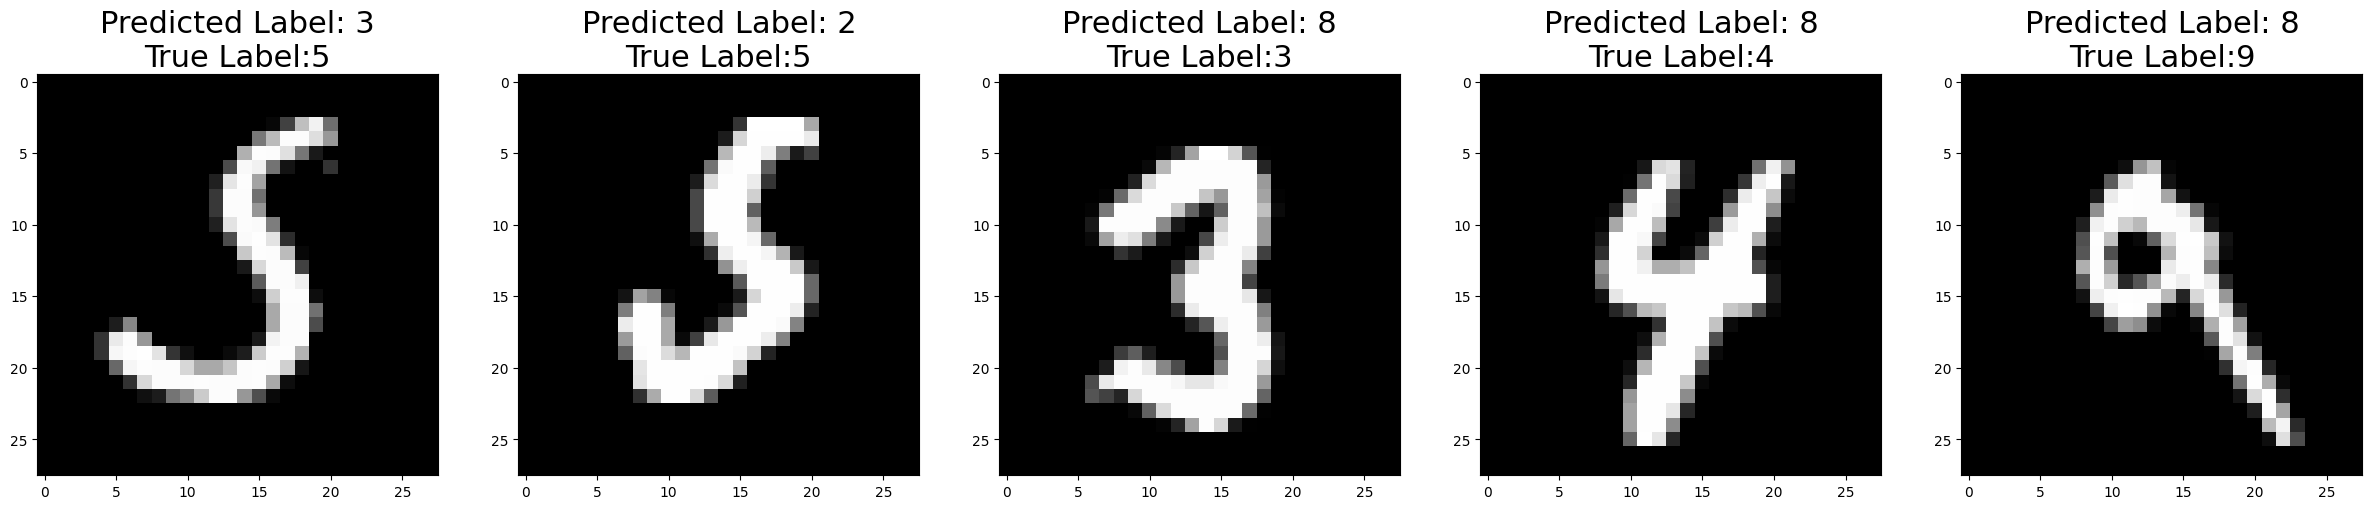

In [65]:
# Showing top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30,30))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Predicted Label: {}\nTrue Label:{}".format(y_p, y_t), fontsize = 22)

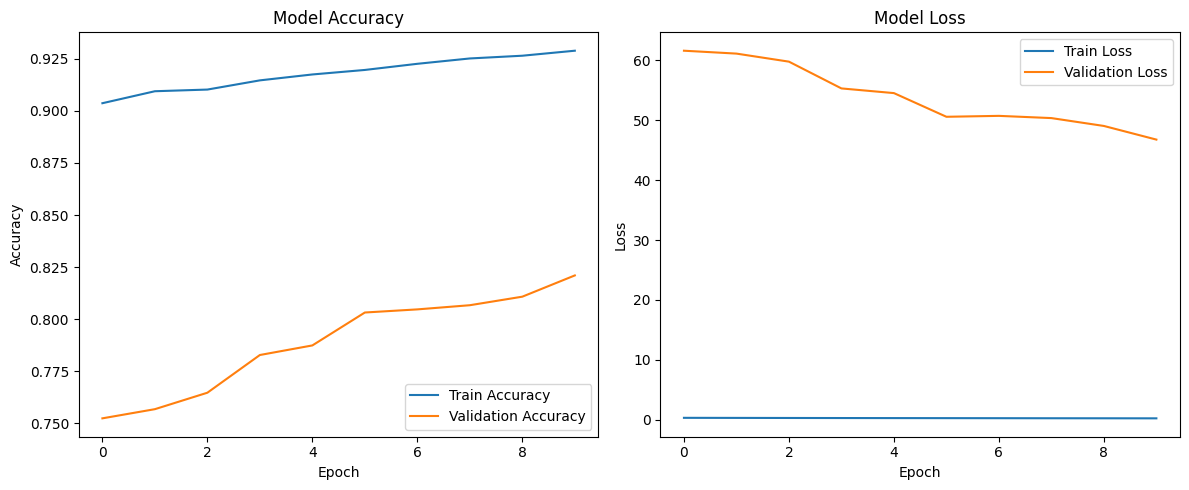

In [66]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


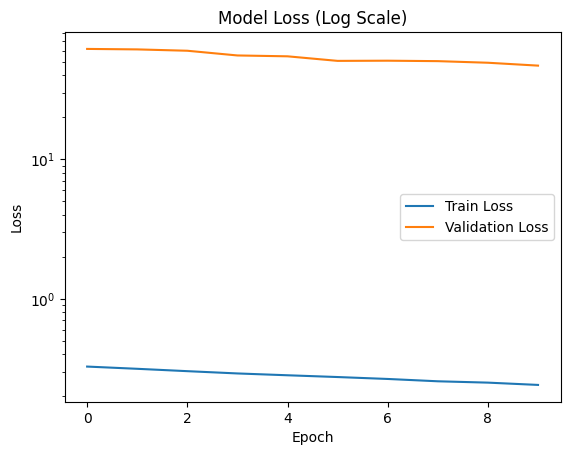

In [69]:
# Log Scale
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')  # <- log scale for Y-axis
plt.title('Model Loss (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
